In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
import matplotlib.pyplot as plt
%matplotlib inline

def read_data(timeframe):
    train = pd.read_csv("data/"+timeframe+"_train.csv")
    valid = pd.read_csv("data/"+timeframe+"_valid.csv")
    test = pd.read_csv("data/"+timeframe+"_test.csv")
    
    return train, valid, test

def xy(df):
    return df.iloc[:, :-1], df.iloc[:, -1]

def get_metrics(preds):
    print("MAE: ", mae(preds["True"], preds.Prediction))
    print("RMSE: ",mse(preds["True"], preds.Prediction, squared = False))

## Day

In [2]:
daytrain, dayvalid, daytest = read_data("day")
daytrainx, daytrainy = xy(daytrain)
dayvalidx, dayvalidy = xy(dayvalid)
daytestx, daytesty = xy(daytest)

In [3]:
daymodel = sm.OLS(daytrainy, daytrainx).fit()

print(daymodel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 change   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):             -0.312
Method:                 Least Squares   F-statistic:                             0.7430
Date:                Mon, 23 May 2022   Prob (F-statistic):                       0.721
Time:                        00:31:18   Log-Likelihood:                          201.84
No. Observations:                  27   AIC:                                     -353.7
Df Residuals:                       2   BIC:                                     -321.3
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

<Figure size 1080x504 with 0 Axes>

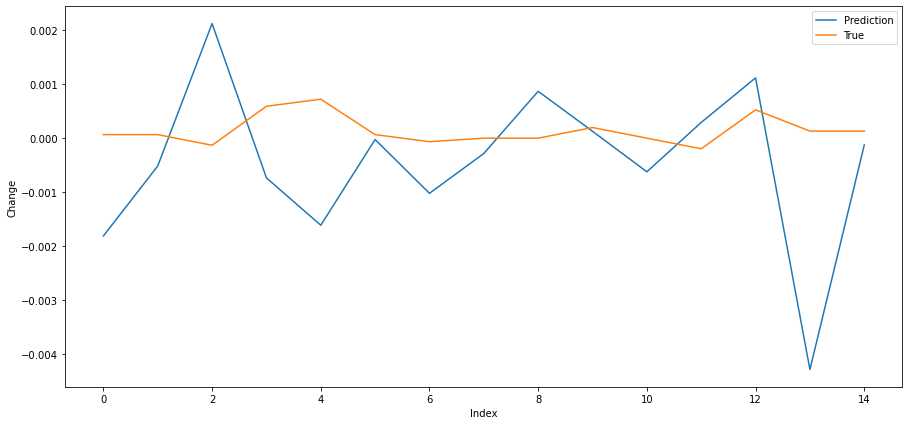

In [4]:
pred = pd.DataFrame({"Prediction": daymodel.predict(daytestx), "True":daytesty})
plt.figure(figsize=(15, 7))
ax = pred.plot(figsize=(15, 7))
ax.set(xlabel='Index', ylabel='Change')
plt.savefig('images/day_linreg_plot.pdf', format = "pdf", dpi = 300,bbox_inches='tight')
plt.savefig('images/day_linreg_plot.jpg', format = "jpg", dpi = 300,bbox_inches='tight')
plt.show()

In [5]:
get_metrics(pred)

MAE:  0.0011344030142482217
RMSE:  0.0016010973551371444


## Hour

In [2]:
hourtrain, hourvalid, hourtest = read_data("hour")
hourtrainx, hourtrainy = xy(hourtrain)
hourvalidx, hourvalidy = xy(hourvalid)
hourtestx, hourtesty = xy(hourtest)

In [3]:
hourmodel = sm.OLS(hourtrainy, hourtrainx).fit()

print(hourmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 change   R-squared (uncentered):                   0.404
Model:                            OLS   Adj. R-squared (uncentered):              0.382
Method:                 Least Squares   F-statistic:                              18.00
Date:                Mon, 23 May 2022   Prob (F-statistic):                    7.47e-59
Time:                        21:12:30   Log-Likelihood:                          2547.5
No. Observations:                 688   AIC:                                     -5045.
Df Residuals:                     663   BIC:                                     -4932.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

<Figure size 1080x504 with 0 Axes>

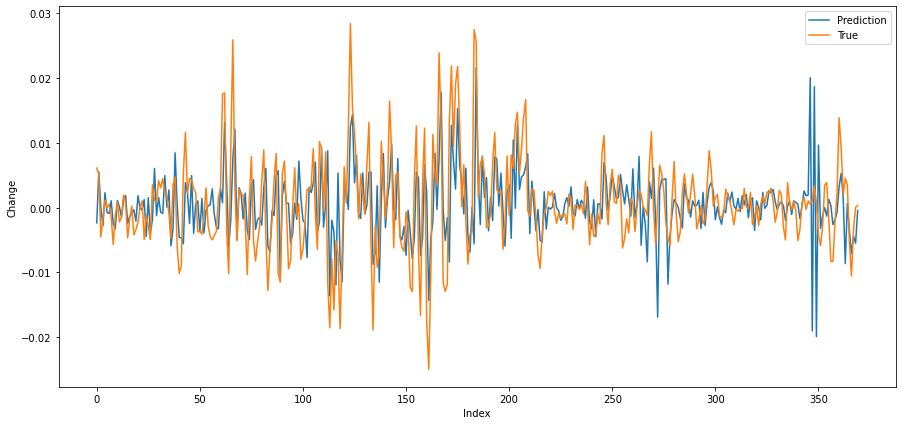

In [4]:
pred = pd.DataFrame({"Prediction": hourmodel.predict(hourtestx), "True":hourtesty})
plt.figure(figsize=(15, 7))
ax = pred.plot(figsize=(15, 7))
ax.set(xlabel='Index', ylabel='Change')
plt.savefig('images/hour_linreg_plot.pdf', format = "pdf", dpi = 300,bbox_inches='tight')
plt.savefig('images/hour_linreg_plot.jpg', format = "jpg", dpi = 300,bbox_inches='tight')
plt.show()

## Minute

In [22]:
minutetrain, minutevalid, minutetest = read_data("minute")
minutetrainx, minutetrainy = xy(minutetrain)
minutevalidx, minutevalidy = xy(minutevalid)
minutetestx, minutetesty = xy(minutetest)

In [23]:
minutemodel = sm.OLS(minutetrainy, minutetrainx).fit()

print(minutemodel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 change   R-squared (uncentered):                   0.394
Model:                            OLS   Adj. R-squared (uncentered):              0.391
Method:                 Least Squares   F-statistic:                              133.1
Date:                Mon, 23 May 2022   Prob (F-statistic):                        0.00
Time:                        21:19:17   Log-Likelihood:                          29451.
No. Observations:                5137   AIC:                                 -5.885e+04
Df Residuals:                    5112   BIC:                                 -5.869e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [24]:
minutetesty.shape

(2753,)

In [33]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

<Figure size 1080x504 with 0 Axes>

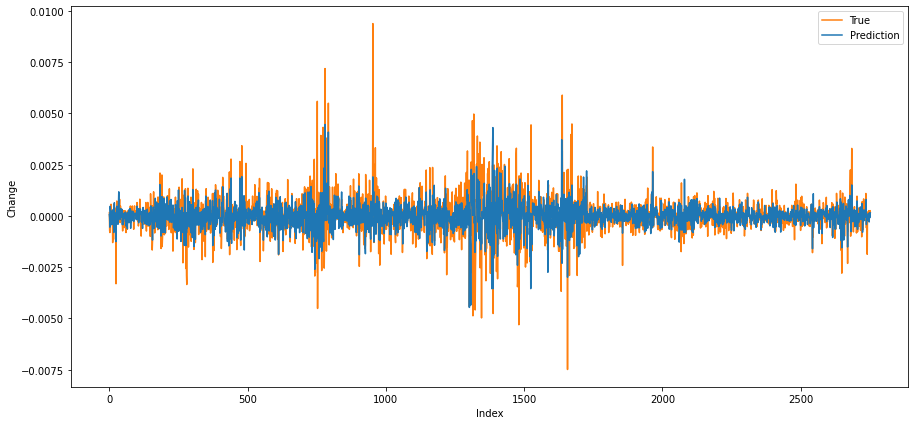

In [37]:
pred = pd.DataFrame({"Prediction": minutemodel.predict(minutetestx), "True":minutetesty})
plt.figure(figsize=(15, 7))
ax = pred[['True', 'Prediction']].plot(figsize=(15, 7), color = ['tab:orange','tab:blue'])
ax.set(xlabel='Index', ylabel='Change')
plt.savefig('images/minute_linreg_plot.pdf', format = "pdf", dpi = 300,bbox_inches='tight')
plt.savefig('images/minute_linreg_plot.jpg', format = "jpg", dpi = 300,bbox_inches='tight')
plt.show()

In [13]:
get_metrics(pred)

MAE:  0.0005059240496583926
RMSE:  0.0007707096160148583
